<a href="https://colab.research.google.com/github/LAMECH9/LAMECH9/blob/main/Copy_of_bagging%2C_boosting_and_stacking_and_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Objective: Train a machine learning model on a housing dataset using ensemble learning techniques: Bagging, Boosting, a

#Download Housing Dataset(Example: California Housing Dataset)
from sklearn.datasets import fetch_california_housing

In [ ]:
#Load dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['target'] = california.target

In [ ]:
#Display basic info
df.info()
print("\nFirst 5 rows:\n", df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

First 5 rows:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.

In [ ]:
# Selecting numerical features and target
X = df[['MedInc', 'HouseAge','AveRooms','AveOccup']].dropna()
y = df['target']

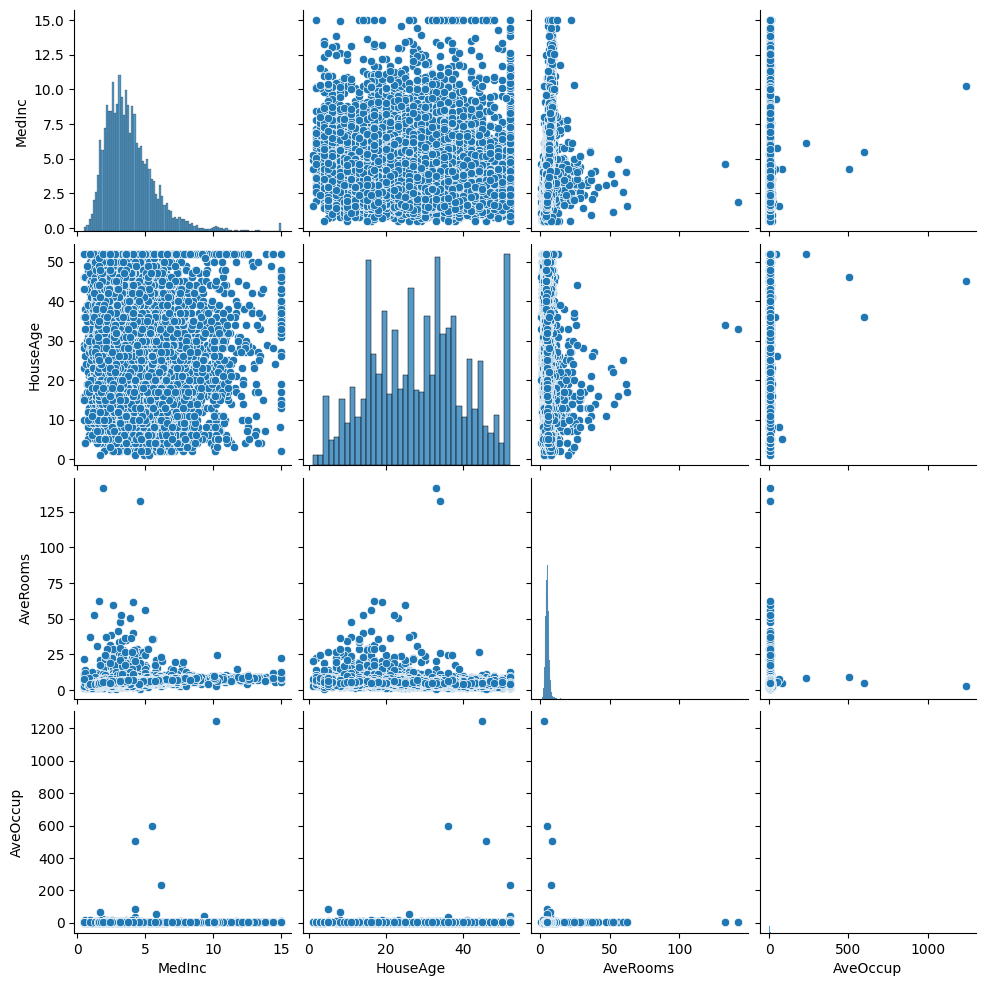

In [ ]:
#Exploratory Data Analysis (EDA)
sns.pairplot(df[['MedInc', 'HouseAge','AveRooms','AveOccup']])
plt.show()

In [ ]:
#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
#Standard features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

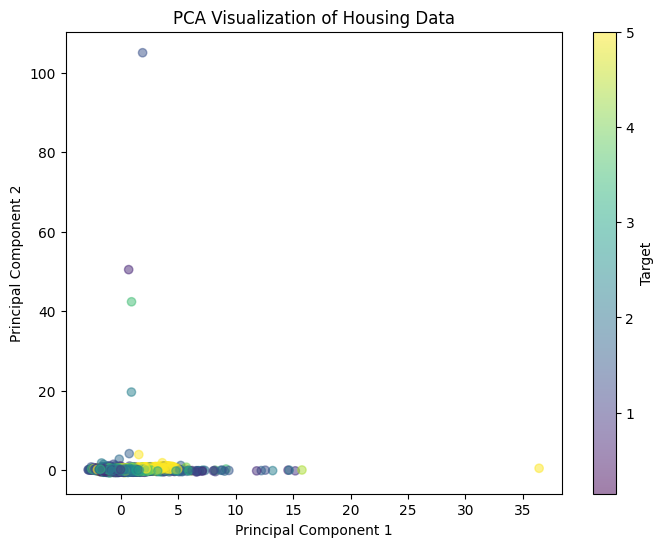

In [ ]:
#PCA Visualization
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(label='Target')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Housing Data')
plt.show()



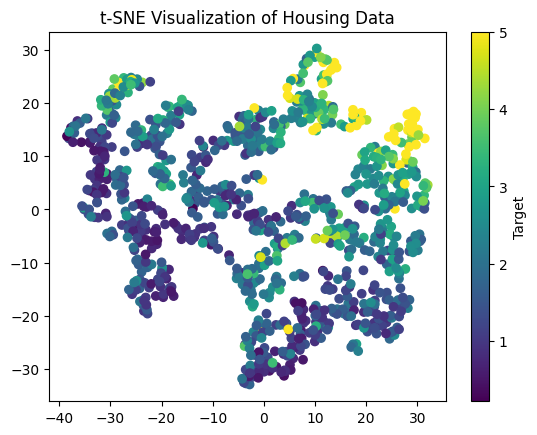

In [ ]:
#Apply t-SNE for Visualization
sample_size = 1000 #Reduce data for t-SNE to avoid computation overload
X_sample, y_sample = X_train[:sample_size], y_train[:sample_size]
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_sample)
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=y_sample, cmap='viridis')
plt.colorbar(label='Target')
plt.title("t-SNE Visualization of Housing Data")
plt.show()

In [ ]:
#Train Ensemble Models
bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
bagging_model.fit(X_train_pca, y_train)

boosting_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
boosting_model.fit(X_train_pca, y_train)

stacking_model = StackingRegressor(
    estimators=[('dt', DecisionTreeRegressor ()), ('rf', RandomForestRegressor())],
    final_estimator=LinearRegression()

)
stacking_model.fit(X_train_pca, y_train)

StackingRegressor(estimators=[('dt', DecisionTreeRegressor()),
                              ('rf', RandomForestRegressor())],
                  final_estimator=LinearRegression())

In [ ]:
#Model Evaluation
def evaluate_model(model, name):
    y_pred = model.predict(X_test_pca)
    print(f"\n{name} Model Evaluation:")
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print ("R^2 Score:", r2_score(y_test, y_pred))

evaluate_model(bagging_model, "Bagging")
evaluate_model(boosting_model, "Boosting")
evaluate_model(stacking_model, "Stacking")


Bagging Model Evaluation:
Mean Absolute Error: 0.7159120632267442
Mean Squared Error: 0.8962375913129419
R^2 Score: 0.31606269020221744

Boosting Model Evaluation:
Mean Absolute Error: 0.7480456782945737
Mean Squared Error: 1.0493336917818799
R^2 Score: 0.19923191216950364

Stacking Model Evaluation:
Mean Absolute Error: 0.7141252069704018
Mean Squared Error: 0.8620824594714687
R^2 Score: 0.34212717267189896


In [ ]:
# User Input for Prediction
print("\nEnter feature values for prediction:")
medInc = float(input("Median Income: "))
HouseAge = float(input("House Age: "))
AveRooms = float(input("Average Rooms: "))
AveOccup = float(input("Average Occupancy: "))

#Preprocess input and make predictions
user_input = ([MedInc, HouseAge, AveRooms, AveOccup]).reshape(1, -1)
user_input = scaler.transform(user_input)
user_input_pca = pca.transform(user_input)

bagging_pred = bagging_model.predict(user_input_pca)
boosting_pred = boosting_model.predict(user_input_pca)
stacking_pred = stacking_model.predict(user_input_pca)

print("\nPredicted House Price using Bagging:", bagging_pred[0])
print("Predicted House Price using Boosting:", boosting_pred[0])
print("Predicted House Price using Stacking:", stacking_pred[0])





Enter feature values for prediction:
